In [ ]:
 Aidan Horvath 10132966 | Michael Krakovsky 10134030 | David Aquino 10134911 | Abhit Sahota 10147351

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Assignment 3

## Problem 1: Clustering
In this part of the assignment we look at [Hierarchical Cluster Analysis (HCA)](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) clustering using scipy.

For reference, [sklearn](http://scikit-learn.org/stable/modules/clustering.html) can be used for many of the other clustering approaches discussed in class.

In chapter 6 of Data Science for Business, the author performs cluster analysis on a [whiskey dataset](http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html).

First, lets import this dataset, drop a few features, and take a look.

In [3]:
whiskey = pd.read_csv("data/scotch.csv")

whiskey = whiskey.drop([u'age', u'dist', u'score', u'percent', u'region', u'district', u'islay', u'midland', u'spey', u'east', u'west', u'north ', u'lowland', u'campbell', u'islands'], axis=1)

In [4]:
whiskey.head()

,color.wyne,color.yellow,color.v.pale,color.pale,color.p.gold,color.gold,color.o.gold,color.f.gold,color.bronze,color.p.amber,...,fin.smoke,fin.sweet,fin.spice,fin.oil,fin.salt,fin.arome,fin.ling,fin.long,fin.very,fin.quick
Aberfeldy,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auchentoshan,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
whiskey.columns.values

array(['color.wyne', 'color.yellow', 'color.v.pale', 'color.pale',
       'color.p.gold', 'color.gold', 'color.o.gold', 'color.f.gold',
       'color.bronze', 'color.p.amber', 'color.amber', 'color.f.amber',
       'color.red', 'color.sherry', 'nose.aroma', 'nose.peat',
       'nose.sweet', 'nose.light', 'nose.fresh', 'nose.dry', 'nose.fruit',
       'nose.grass', 'nose.sea', 'nose.sherry', 'nose.spicy', 'nose.rich',
       'body.soft', 'body.med', 'body.full', 'body.round', 'body.smooth',
       'body.light', 'body.firm', 'body.oily', 'pal.full', 'pal.dry',
       'pal.sherry', 'pal.big', 'pal.light', 'pal.smooth', 'pal.clean',
       'pal.fruit', 'pal.grass', 'pal.smoke', 'pal.sweet', 'pal.spice',
       'pal.oil', 'pal.salt', 'pal.arome', 'fin.full', 'fin.dry',
       'fin.warm', 'fin.big', 'fin.light', 'fin.smooth', 'fin.clean',
       'fin.fruit', 'fin.grass', 'fin.smoke', 'fin.sweet', 'fin.spice',
       'fin.oil', 'fin.salt', 'fin.arome', 'fin.ling', 'fin.long',
       'fin.very

We see that our dataset is composed of categorical features describing the Colour, Nose, Body, Palate, and Finish of each whiskey. Each row of data is refered to as the feature vector which describes the whiskey. In this case, each whiskey has a feature vector of 68 attributes.

The next step is determining how to measure similarity between feature vectors. 

** Question 1**  
In class, we learned about various distance functions used to calculate similarity (euclidean, manhattan, jaccard, cosine). According to you, which distance function is the most appropriate to this dataset and why?

---

Question One:

Since we are comparing whisky brands based on multiple product descriptors, the Jaccard Distance is most appropriate because it requires the use of the Jaccard similarity, which is able to incorporate multiple descriptors relatively easily. The Jaccard similarity is calculated by finding the size of both the intersection and union between characteristics shared by both data sets. This is appropriate for the whisky problem because identifying common characteristics between the two sets is important, but dissimilarity between the two is not. For example, in finding similar whiskeys it is significant if two whiskeys are both full, but it may not be significant that they are both not sweet. Furthermore, Jaccard distance works well for binary sets such as the data provided here. For example, a whiskey is either sweet or not sweet; no degree of sweetness is given. 

While the other distance measures can also be used to determine similarity, they were deemed inappropriate for the following reasons: 

Euclidean distance: Unlike Jaccard distance, Euclidean distance penalizes two whiskeys for having two dissimilar characteristics. As noted, we see this as less relevant here, since any whiskey drinker would be more concerned with finding common characteristics, and less concerned with how dissimilar two uncommon characteristics are. 

Manhattan distance: Like Euclidean distance, Manhattan distance penalizes whiskeys for having dissimilar characteristics, instead of merely rewarding whiskeys for having the same characteristics. Furthermore, Manhattan distance calculates distance along purely vertical or horizontal lines in the xy plane. This is not appropriate for a problem such as this. 

Cosine similarity: Cosine similarity is generally used when characteristics are non-binary, which is not the case for the whiskey data. For example, as noted above a given whiskey is either sweet or not sweet; no degree of sweetness is given. Hence, Jaccard distance was used. 

---
Suppose you are interested in finding whiskeys that are similar to Highland Park.

** Question 2 **  
The code below calculates the euclidean distance between Highland Park and other whiskeys and returns the closest 10 whiskeys. Perform the same analysis using at least [one other distance function](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).

In [102]:
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform

distances = pd.DataFrame()
highland_loc = np.where(whiskey.index == 'Highland Park')[0][0]

euclidean_distances = distance.squareform(distance.pdist(whiskey, 'euclidean'))
euclidean_closest = np.argsort(euclidean_distances[:, highland_loc])
distances['euc_name'] = whiskey.index[euclidean_closest]
distances['euc_score'] = euclidean_distances[euclidean_closest, highland_loc]

distances.head(10)

,euc_name,euc_score
0,Highland Park,0.000000
1,North Port,3.162278
2,Glendronach,3.162278
3,Balmenach,3.162278
4,Balvenie,3.162278
5,Lochside,3.162278
6,Glen Albyn,3.316625
7,Saint Magdalene,3.316625
8,Glendullan,3.316625
9,Glenfarclas,3.316625


In [103]:
from sklearn.metrics import jaccard_similarity_score   

highland_loc = np.where(whiskey.index == 'Highland Park')[0][0]  # Find where the Highland Park row

# Find the Jaccard Similarities and place everything in an array
jaccardSimilarities = []
for index, row in whiskey.iterrows(): 
    if (index != 'Highland Park'):
        jaccardSimilarities.append(((jaccard_similarity_score(whiskey.iloc[highland_loc], row)), index))

# Find the top 10 similarities within the array
distance = [(0, 0) for x in range (0, 10)]

for i in jaccardSimilarities:
    if i[0] > distance[0][0]:
        distance[0] = i
        distance.sort()

# Calculate the distance of the whiskies with the highest similarities
jaccardDistances = []
for i in distance:
    newElement = (1 - i[0], i[1])
    jaccardDistances.append(newElement)
    
# Display the results from the 10th closest to the closest (the last element)
print(jaccardDistances) 

[(0.16176470588235292, 'Craigellachie'), (0.16176470588235292, 'Glen  Albyn'), (0.16176470588235292, 'Glendullan'), (0.16176470588235292, 'Glenfarclas'), (0.16176470588235292, 'Littlemill'), (0.1470588235294118, 'Balmenach'), (0.1470588235294118, 'Balvenie'), (0.1470588235294118, 'Glendronach'), (0.1470588235294118, 'Lochside'), (0.1470588235294118, 'North Port')]


Suppose you now want to categorize the whiskeys based on how similar they are to each other. You can use scipy's hierarchical/agglomerative clustering to build a dendrogram.

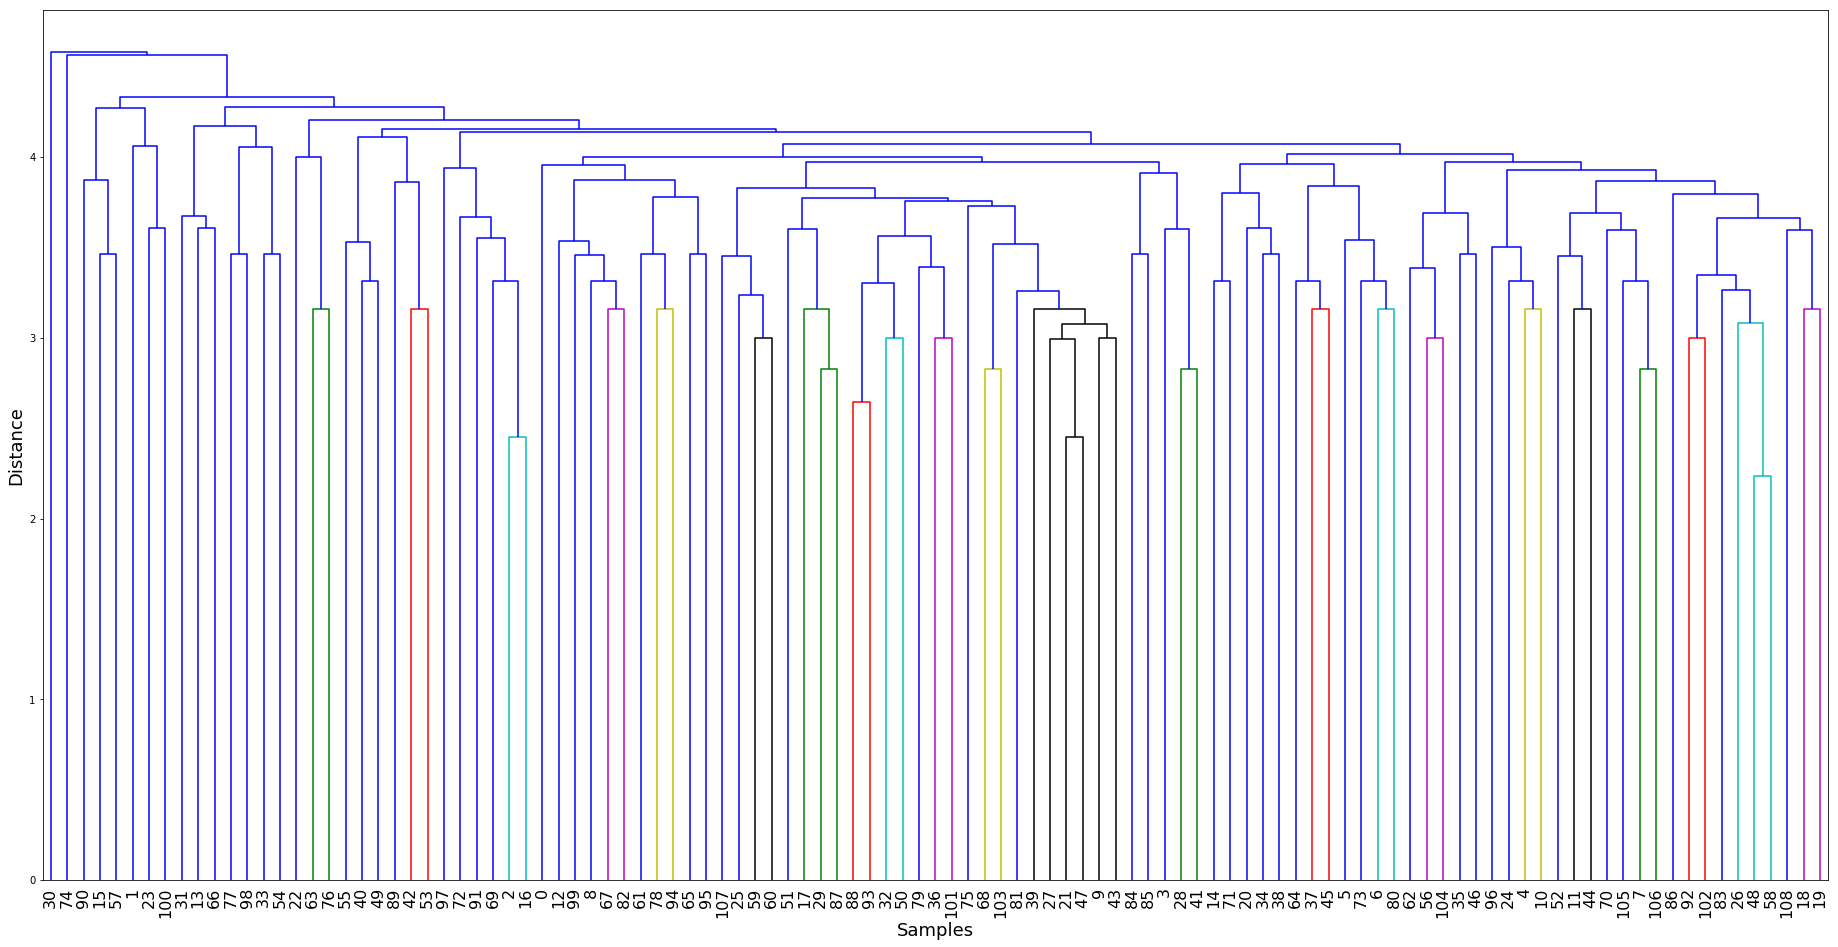

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

# This function gets pairwise distances between observations in n-dimensional space.
dists = pdist(whiskey, metric="euclidean")

# This scipy's function performs hierarchical/agglomerative clustering on the condensed distance matrix y.
links = linkage(dists, method='average')

# Now we want to plot those 'links' using "dendrogram" function
plt.rcParams['figure.figsize'] = 32, 16

den = dendrogram(links)

plt.xlabel('Samples',fontsize=18)
plt.ylabel('Distance',fontsize=18)
plt.xticks(rotation=90,fontsize=16)
plt.show()

** Question 3 **  
Discuss some insights you can decipher from this dendrogram.

---

Question Three:
A dendrogram is a tree diagram that represents how elements are arranged by hierarchical clustering. The more similar two Whiskey groups are together, the more likely they will be paired at the lower levels of the hierarchical clusters. Therefore, using this knowledge, the method builds the hierarchy from the individual elements by progressively merging the clusters. The closest elements are merged at the beginning while unique elements are merged later within the process. Based on this knowledge, certain insights can be gained from the dendogram supplied: 

First, insights can be made about the least, and most, similar whiskey pairs. Element 30 within the whiskey cluster group is the most unique since it was merged at the end of the algorithm. Contrastingly, whiskeys 48 and 58 are the most similar since the distance between them appears to be the lowest compared to any other pair. 

Next, the structure of the dendrogram can be used to cluster certain whiskeys together in groups, by setting a desired distance cutoff level. This would be useful for business functions such as advertising, product placement in certain geographic locations vs. others, and potentially pricing. The optimal cutoff level would vary depending on a variety of factors. For example, the desired cluster size may vary depending on the firm’s ability to market whiskeys directly to specific consumers (supporting smaller cluster sizes) or in aggregate (supporting larger cluster sizes). With that being said, it seems that a cluster cut-off distance between 3 and 4 makes the most sense. Anything lower would essentially result in many single-whiskey clusters, while anything higher would likely be too broad and would merely separate outliers from the rest of the set. 


---
## Problem 2: Ensemble Learning

In this part of the assignment, we look at [Ensemble Methods with sklearn](http://scikit-learn.org/stable/modules/ensemble.html). Specifically, we use [Forests of randomized trees](http://scikit-learn.org/stable/modules/ensemble.html#forest), [Gradient Tree Boosting](http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)

### Classifiction using Forest of Randomized Trees

The code below trains a `RandomForestClassifier` on the iris dataset.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris["target"], test_size=0.33, random_state=15)

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train,y_train)
rnd_pred = rnd_clf.predict(X_test)

print(rnd_clf.__class__.__name__, accuracy_score(y_test, rnd_pred))

RandomForestClassifier 0.96


If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest. This can give a quick idea of what features actually matter if you need to perform feature selection

In [9]:
for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.118277896589
sepal width (cm) 0.0309929315816
petal length (cm) 0.428175097905
petal width (cm) 0.422554073924


** Question 4 **  
Use the cell below to train a classifier of your choice using only petal length and petal width and compare the accuracy to the one of the Random Forest. (Hint: length and width are the last two columns of the data array.) 

In [10]:
## Your code here

### Regression using Gradient Tree Boosting

The code below uses `GradientBoostingRegressor` on sample data.

In [11]:
# Data Sampling
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 10*X[:, 0]**3 + .08 * np.random.randn(100)

In [12]:
# Training
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

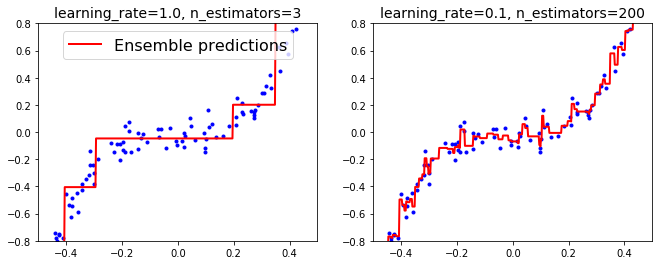

In [13]:
# Plotting
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.8, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.8, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

plt.show()

As you can see, the model on the left underfits the data and the model on the right overfits the data.

** Question 5 **  
Which model parameters can you adjust to optimize the fit?

---

*** Answer Here ***

---

### Classification using Stacked Generalization

In this section, we combine the various ensemble methods learned to create a model stack for classification task.

The task is to perform optical character recognition by classifying handwritten numbers from 0 to 9. Here is a sample of our training data from the dataset called MNIST:

![numbers](data/numbers.png)

The following code loads the MNIST data, and splits it into a training set, a validation set, and a test set.

In [14]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata('MNIST original')
X,y = mnist["data"], mnist["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

** Question 6 **  

*Step 1: Build individual ensemble classifiers.*

Train a [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and a [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) using `X_train` and `y_train`.

Use each of the model to predict the values of `X_test` and calculate the accuracy of against `y_test`.

*Step 2: Combine classifiers through model stacking.*

Use the classifiers from step 1 to predict againsts their own training data. Combine the two resulting sets of prediction into a new set called `X_train_pred` and train a new `RandomForestClassifier` using the new `X_train_pred`, and previous`y_train` to create a blender.

Use this blender to predict `X_test` and compare the accuracy against `y_test` to the accuracy acheived with the individual classifiers in step 1.

In [15]:
## Your code here

## Problem 3: Using Neural Networks for Classification
In this part, we want to use ANN for the purpose of classification. More specifically, we use a Multi-layer Perceptron to do so.
[Scikit Learn](http://scikit-learn.org/stable/modules/neural_networks_supervised.html) has necessary tools to develop such a model. 

** Question 7 ** 
Using MNIST data set, develop an ANN classifier with LBFGS solver and $\alpha = 1e-5$. Use one hidden layer of size 50 and without random state. If a parameter is not mentioned in this description, use the default values.

Use the same train set as last question and then test it on the test set and measure its accuracy and the time spent to solve it.
(You can use *%%time* magic for a cell to measure the time spent to finish that cell.)


In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata('MNIST original')
x,y = mnist["data"], mnist["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [2]:
%%time 
# Create your MLPClassifier
neuralNetwork = MLPClassifier(hidden_layer_sizes=(50, ), solver='lbfgs', alpha=10**(-5))
neuralNetwork.fit(x_train, y_train)
print(neuralNetwork.score(x_test, y_test))      # Print the accuracy

0.881082251082
Wall time: 1min 42s


**Question 8**
By changing the parameters in your ANN model above, develop 3 variations in the cells below. In each case, measure time and accuracy. At the end, choose one of these 4 (including the original model you developed above) explaining why you chose it.

In [3]:
%%time 
# Create your MLPClassifier
neuralNetwork = MLPClassifier(hidden_layer_sizes=(100, ), solver='lbfgs', alpha=10**(-5))
neuralNetwork.fit(x_train, y_train)
print(neuralNetwork.score(x_test, y_test))      # Print the accuracy

0.944978354978
Wall time: 2min 6s


In [4]:
%%time 
# Create your MLPClassifier
neuralNetwork = MLPClassifier(hidden_layer_sizes=(50, ), solver='sgd', alpha=10**(-5))
neuralNetwork.fit(x_train, y_train)
print(neuralNetwork.score(x_test, y_test))      # Print the accuracy

0.200692640693
Wall time: 21.3 s


In [6]:
%%time 
# Create your MLPClassifier
neuralNetwork = MLPClassifier(hidden_layer_sizes=(50, ), solver='lbfgs', alpha=10**(-2))
neuralNetwork.fit(x_train, y_train)
print(neuralNetwork.score(x_test, y_test))      # Print the accuracy

0.886233766234
Wall time: 1min 35s




** Explain which model you chose and why **



Question Two: 
After running the initial model, we have produced an accuracy of 88.108% and a run time of 1:42 with the parameters dictated by the question. Within the next three iterations, we have decided to change each parameter to observe its effects on the model.

First, we changed the size of our hidden layer to 100. This proved quite valuable since it increased our accuracy to 94.497%. The model did suffer in performance time since it took an additional 24 seconds to execute (total time was 2:06). However,  we see the extra 6% accuracy as worth the additional wait time, making this model superior to the initial model.

Second, we have changed our solver parameter to ‘sgd’ which stands for stochastic gradient descent. The model resulted in poor results, with an accuracy of 20.069%. Although the model only took 21 second to run, the substantial decrease in accuracy makes this model inferior to models using “lbfgs”, especially since the run times of these other models, while longer, are by no means extensive (~2 mins or less in each case). 

Finally, we decreased the regularization term (alpha) to 1e - 7. The accuracy of the model was slightly higher than that of the original model (88.62% vs. 88.11%), however was lower than the model with the larger hidden layer. The run time (1:35) was similar to the original model, and lower than that of the model with the larger hidden layer. 

To conclude, increasing the size of our hidden layer from 50 to 100 yielded the best results, as it produced the highest accuracy with only moderately longer run times. Therefore, we have decided to choose this model to correctly predict the data. It is noted that both a larger hidden layer and a lower regularization term improved upon the original model. Hence, if we were able to further test models, a model with both a larger hidden layer, and a lower regularization term would be tested, in the hopes that accuracy would further improve. 


## Problem 4: Using PCA 
Let's Apply PCA here to see if we can reduce the dimension of our data while retaining most of the variation. You may remeber from the course that one of the applications of PCA is to reduce dimensinality by finding the eigen vectors and eigen values and then mapping the whole dataset into the new space defined by those vectors.

To do so, we use PCA package from [Scikit Learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

** Question 9 **
Apply PCA on the same data (MNIST) to reduce the dimension of the data while retaining 95% of the variance. As for the rest of the parameters, go with the default settings. At the end, measure the variance you explained from the original data and also save your data in new nd_array named X_PCA.


In [20]:
## Your code goes Here

** Question 10 **
Having the new matrix X_PCA, use the same split we did right before question 6, and prepare new sets of train and test data along with corresponding labels.


In [21]:
## Your code goes Here


** Quesetion 11 ** 
Pick the model of your choice from question 8, and this time train it on this new data set you made in question 10. Measure time and accuracy, and then write your insights about this process (from question 7 upto this part).

In [22]:
## Your code goes Here


** write your comments and insights here **